In [1]:
from helpers import get_access_token, create_quadrants
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import box
import osmnx as ox

In [3]:
# Example usage:
access_token = get_access_token()
print(access_token)

ya29.a0AZYkNZj-S8CYxvTCLfd3eT41APpaVsJNuUcOl36oMxx0NACu0OXqiryYDK3TZTB_oyLVCHAxTClJrnlU7bXpje6BHlvU8EhHSnJ2G5kCKPNp-JTh7UzDnU2vOp0t5PEUbA85WRAf4eT29WcuumFeMJxcyasO7XotTsfu-UtvkgaCgYKAZASARASFQHGX2MiQs7RJqgkABve8gs7zuV3Yg0177


In [2]:
# Subdividing the city into quadrants to narrow down the search area
place_name = "New York, New York, USA"
num_divisions = 30
quadrants = create_quadrants(place_name, num_divisions)

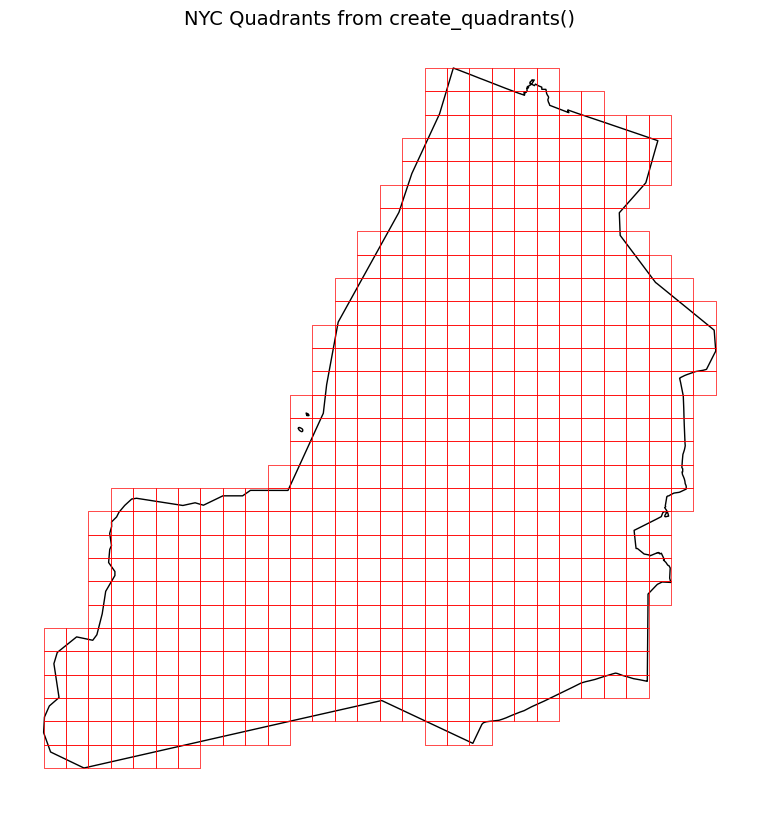

In [2]:
# Imports necessários
import osmnx as ox
import geopandas as gpd
from shapely.geometry import box
import matplotlib.pyplot as plt

# Subdividing the city into quadrants to narrow down the search area
place_name = "New York, New York, USA"
num_divisions = 30
quadrants = create_quadrants(place_name, num_divisions)

# Convertemos os quadrantes em polígonos shapely
quadrant_polygons = [box(lon_sw, lat_sw, lon_ne, lat_ne) for (lat_sw, lon_sw), (lat_ne, lon_ne) in quadrants]

# Criar GeoDataFrame com os quadrantes
quadrants_gdf = gpd.GeoDataFrame(geometry=quadrant_polygons, crs="EPSG:4326")

# Obter novamente o polígono da cidade para sobrepor
city_boundary = ox.geocode_to_gdf("New York, New York, USA")

# Plotar o mapa
fig, ax = plt.subplots(figsize=(10, 10))
city_boundary.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=1)
quadrants_gdf.plot(ax=ax, facecolor='none', edgecolor='red', linewidth=0.5)
plt.title("NYC Quadrants from create_quadrants()", fontsize=14)
plt.axis('off')
plt.show()


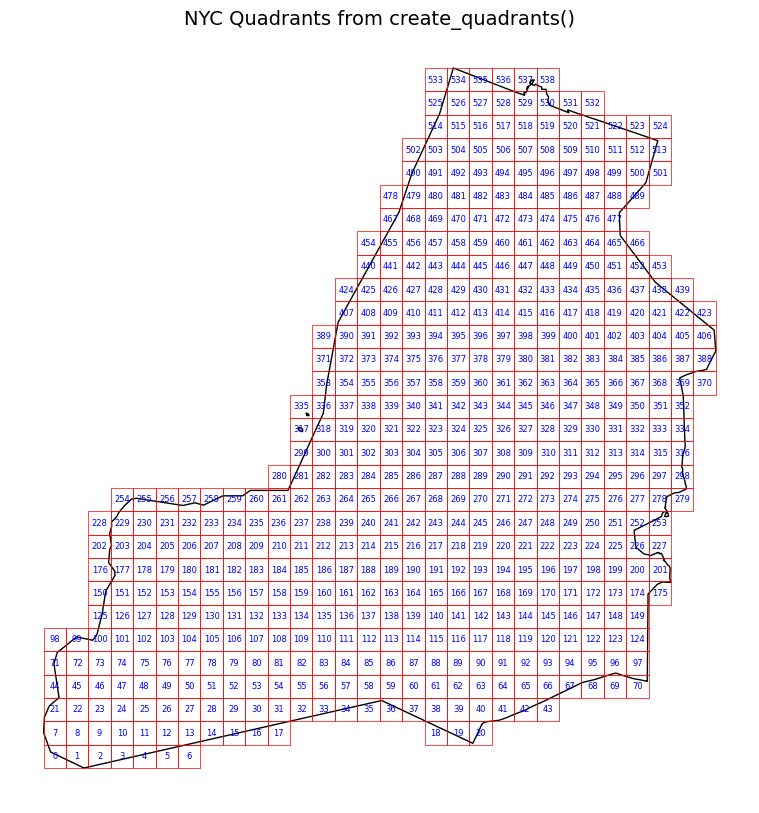

In [3]:
# Imports necessários
import osmnx as ox
import geopandas as gpd
from shapely.geometry import box
import matplotlib.pyplot as plt

# Subdividing the city into quadrants to narrow down the search area
place_name = "New York, New York, USA"
num_divisions = 30
quadrants = create_quadrants(place_name, num_divisions)

# Convertemos os quadrantes em polígonos shapely
quadrant_polygons = [box(lon_sw, lat_sw, lon_ne, lat_ne) for (lat_sw, lon_sw), (lat_ne, lon_ne) in quadrants]

# Criar GeoDataFrame com os quadrantes
quadrants_gdf = gpd.GeoDataFrame(geometry=quadrant_polygons, crs="EPSG:4326")

# Obter novamente o polígono da cidade para sobrepor
city_boundary = ox.geocode_to_gdf("New York, New York, USA")

# Plotar o mapa
fig, ax = plt.subplots(figsize=(10, 10))
city_boundary.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=1)
quadrants_gdf.plot(ax=ax, facecolor='none', edgecolor='red', linewidth=0.5)

# >>> ADICIONAR NÚMEROS NOS QUADRANTES AQUI <<<
for i, poly in enumerate(quadrants_gdf.geometry):
    x, y = poly.centroid.x, poly.centroid.y
    ax.text(x, y, str(i), fontsize=6, ha='center', va='center', color='blue')

# Finalizar o plot
plt.title("NYC Quadrants from create_quadrants()", fontsize=14)
plt.axis('off')
plt.show()
